# Iris Flower Classification using Machine Learning

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data and exploring the data using pandas

In [111]:
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [112]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [113]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [115]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [116]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [117]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### There are no null values. So we can proceed further.

### Finding size of the dataset 

In [118]:
df.shape

(150, 6)

In [119]:
# Droping the unnecessary columns
df=df.drop(['Id'],axis=1)

In [120]:
# changing the column names as per our need
df.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Species']

In [122]:
flower_count=df['Species'].value_counts()
print("Count of the type of flower species in the data:")
flower_count

Count of the type of flower species in the data:


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [123]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [125]:
#Silencing the warnings for better visualization
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

<Axes: >

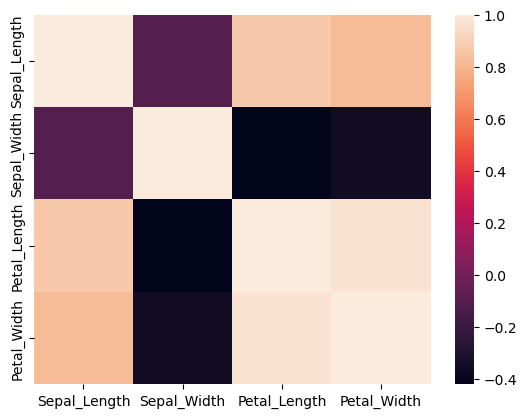

In [106]:
sns.heatmap(df.corr())

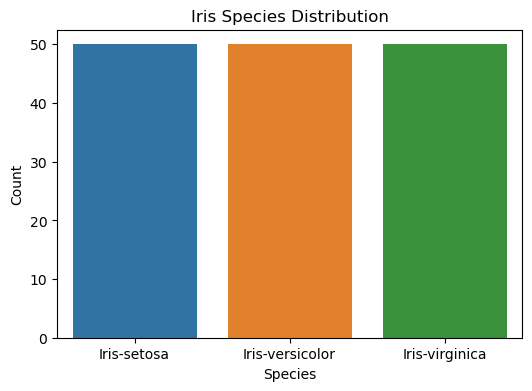

In [92]:
# Bar plot of iris species distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Species', data=df)
plt.title('Iris Species Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

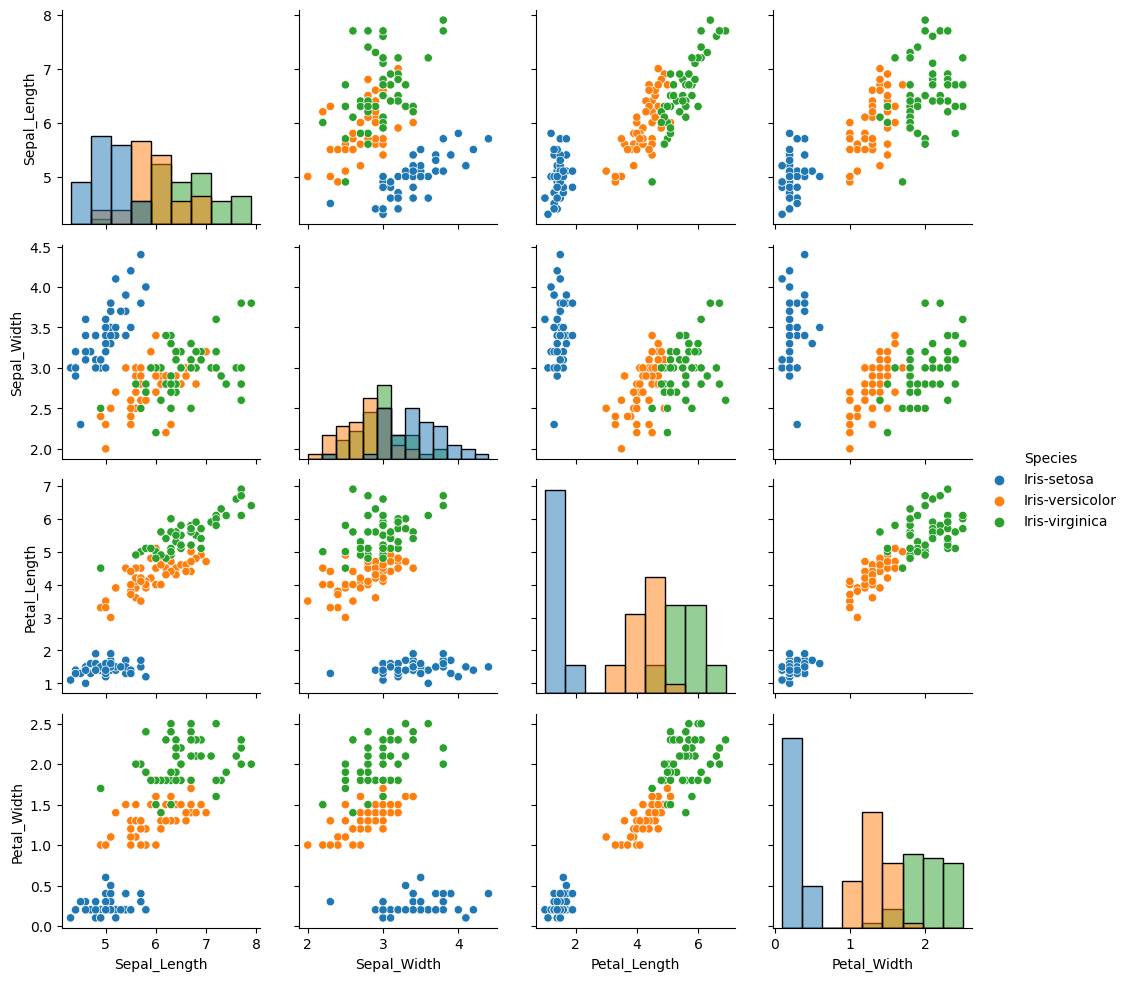

In [93]:
g = sns.PairGrid(df, hue='Species')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [107]:
df.corr()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,-0.109369,0.871754,0.817954
Sepal_Width,-0.109369,1.000000,-0.420516,-0.356544
Petal_Length,0.871754,-0.420516,1.000000,0.962757
Petal_Width,0.817954,-0.356544,0.962757,1.000000


In [95]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Mean Squared Error: 0.23386845786901478
R-squared: 0.9286418347661203


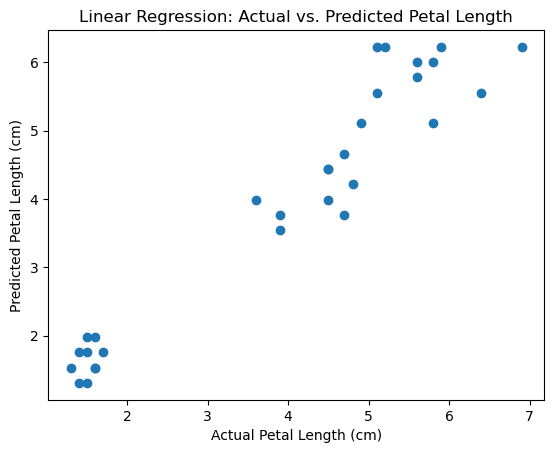

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Iris dataset
X, y = df['Petal_Length'], df['Petal_Width']

# Select the features and target variable (petal length)
X = df[['Petal_Width']]
y = df[['Petal_Length']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

%matplotlib inline
# Plot the predicted vs. actual petal length
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Petal Length (cm)")
plt.ylabel("Predicted Petal Length (cm)")
plt.title("Linear Regression: Actual vs. Predicted Petal Length")
plt.show()


In [97]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(120, 1) (30, 1) (120, 1) (30, 1)


## Applying logistic regression for Petal_Length and Petal_Width as they had the better correlation between them as observed in heatmap

Accuracy: 1.0
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


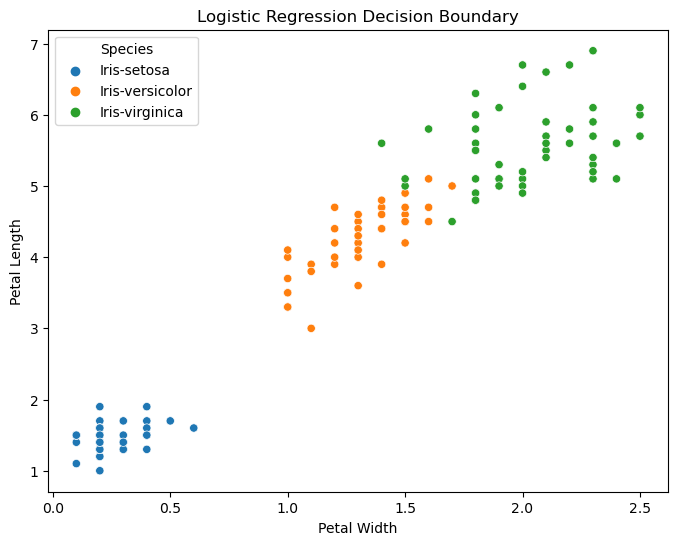

In [151]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X1 = df[['Petal_Width', 'Petal_Length']]
y1 = df['Species']

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

# Initialize and train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X1_train, y1_train)

# Make predictions on the test set
y1_pred = model.predict(X1_test)

# Evaluate the model
accuracy = accuracy_score(y1_test, y1_pred)
report = classification_report(y1_test, y1_pred)
conf_matrix = confusion_matrix(y1_test, y1_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

%matplotlib inline
# Visualize the decision boundary
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Petal_Width', y='Petal_Length', hue='Species', data=df)

# Plot decision boundary and margins

plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Petal Width")
plt.ylabel("Petal Length")
plt.show()

In [144]:
X1_train

array([[-1.30948358, -1.5639872 ],
       [-1.04292204, -1.27728011],
       [ 0.28988568,  0.38562104],
       [-1.30948358, -1.21993869],
       [-1.30948358, -1.39196294],
       [ 0.95628954,  0.72966956],
       [ 0.42316645,  0.44296246],
       [-1.30948358, -1.27728011],
       [-1.30948358, -1.33462153],
       [-1.44276436, -1.27728011],
       [ 0.95628954,  0.78701097],
       [ 0.55644722,  0.44296246],
       [ 0.42316645,  0.5576453 ],
       [-1.04292204, -1.39196294],
       [-1.30948358, -1.27728011],
       [-0.24323741, -0.01576889],
       [ 0.42316645,  0.78701097],
       [ 0.82300877,  1.01637665],
       [ 0.28988568,  0.38562104],
       [ 1.75597417,  1.36042516],
       [ 0.15660491,  0.2709382 ],
       [ 1.22285108,  1.64713226],
       [ 0.42316645,  0.44296246],
       [-1.30948358, -1.33462153],
       [ 1.08957031,  1.70447368],
       [-0.24323741,  0.21359679],
       [-1.30948358, -1.33462153],
       [-1.17620281, -1.39196294],
       [-1.04292204,

In [146]:
print(X1_train.shape,X1_test.shape,y1_train.shape,y1_test.shape)

(120, 2) (30, 2) (120,) (30,)


In [147]:
adc=np.array([[-1.30948358, -1.5639872]])
adc.reshape(-1,1)
model.predict(adc)

array(['Iris-setosa'], dtype=object)

### Checked manually by giving a value present in our dataset and got the correct answer
### **************************************************************************************

## Applying logistic regression for Sepal_Length and Speal_Width

Accuracy: 0.9
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.88      0.78      0.82         9
 Iris-virginica       0.83      0.91      0.87        11

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30

Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


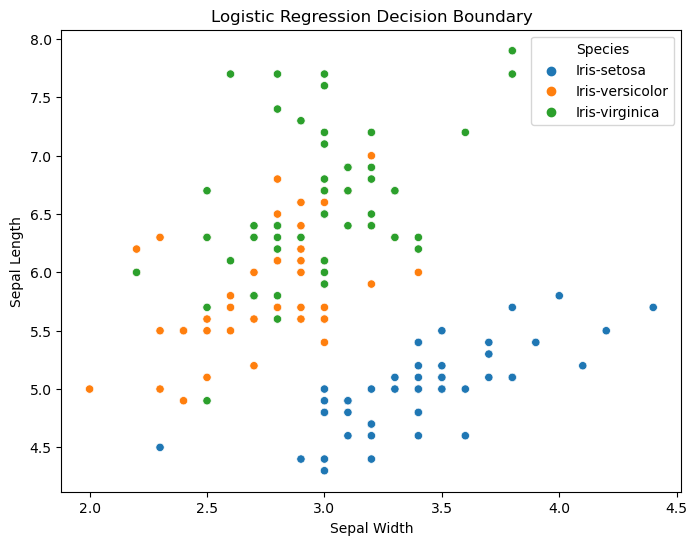

In [153]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X2 = df[['Sepal_Width', 'Sepal_Length']]
y2 = df['Species']

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

# Initialize and train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X2_train, y2_train)

# Make predictions on the test set
y2_pred = model.predict(X2_test)

# Evaluate the model
accuracy = accuracy_score(y2_test, y2_pred)
report = classification_report(y2_test, y2_pred)
conf_matrix = confusion_matrix(y2_test, y2_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

%matplotlib inline
# Visualize the decision boundary
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sepal_Width', y='Sepal_Length', hue='Species', data=df)

# Plot decision boundary and margins

plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")
plt.show()

### As we can see first we applied logistic regression using Petal_Width and Petal_Length and second we applied using Sepal_Width and Sepal_Length.
### We get more accuracy while using Petal_Width and Petal_Length

### ************************************************************************************************
## Applying Decision Tree Classification

In [154]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have your data loaded into a DataFrame named 'df'
X3 = df[['Petal_Width', 'Petal_Length']]
y3 = df['Species']

# Split the data into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X3_train, y3_train)

# Make predictions on the test set
y3_pred = model.predict(X3_test)

# Evaluate the model
accuracy = accuracy_score(y3_test, y3_pred)
report = classification_report(y3_test, y3_pred)
conf_matrix = confusion_matrix(y3_test, y3_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## We get the same accuracy as it came for Logistic Regression. So we can use any one of the Machine Learning Techniue for Iris Flower Classification